In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

# Convergence

## E-cut convergence

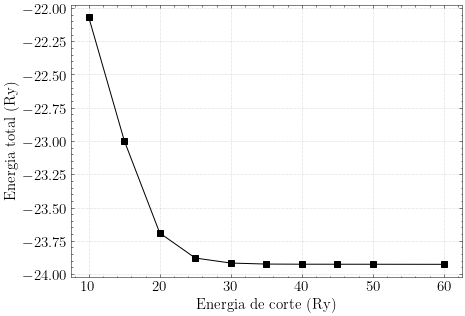

In [57]:
e_data = np.loadtxt('../energy-cutoff-conv/ecut.dat')

plt.plot(e_data[:,0], e_data[:,1], marker='s', c='k')
plt.xlabel('Energia de corte (Ry)')
plt.ylabel('Energia total (Ry)')
plt.grid(ls=':')
plt.savefig('figs/e-cut.png', dpi=300)
plt.show()

## k convergence

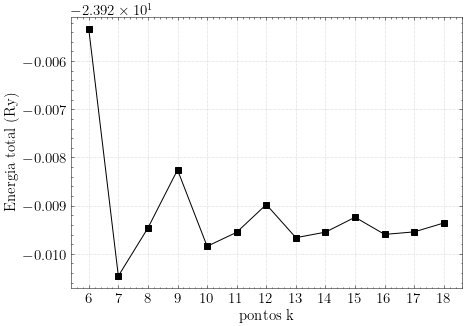

In [58]:
k_data = np.loadtxt('../k-conv/kval.dat')

plt.plot(k_data[:,0], k_data[:,1], marker='s', c='k')
plt.xlabel('pontos k')
plt.ylabel('Energia total (Ry)')
plt.xticks(k_data[:,0])
plt.grid(ls=':')
plt.savefig('figs/k-val.png', dpi=300)
plt.show()

## a convergence

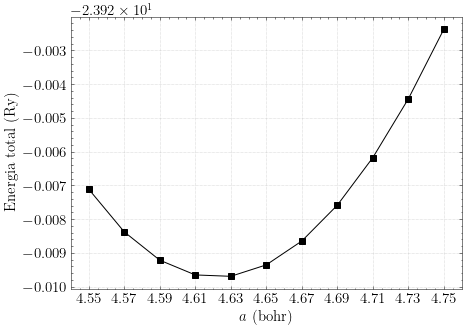

In [59]:
a_data = np.loadtxt('../a-conv/aval.dat')

plt.plot(a_data[:,0], a_data[:,1], marker='s', c='k')
plt.xlabel('$a$ (bohr)')
plt.xticks(a_data[:,0])
plt.ylabel('Energia total (Ry)')
plt.grid(ls=':')
plt.savefig('figs/a-val.png', dpi=300)
plt.show()

# DOS

In [60]:
def get_dos(data, fermi_energy):
    energy = data[:,0] - fermi_energy
    dos = data[:,1]
    return energy, dos

In [61]:
data_dos_16 = np.loadtxt('../dos/graphene-dos-16.dat')
data_dos_17 = np.loadtxt('../dos/graphene-dos-17.dat')
data_dos_18 = np.loadtxt('../dos/graphene-dos-18.dat')

fermi_energy_16 = 0.573
fermi_energy_17 = 0.613
fermi_energy_18 = 0.721

In [62]:
# DOS analysis

energy_16, dos_16 = get_dos(data_dos_16, fermi_energy_16)
energy_17, dos_17 = get_dos(data_dos_17, fermi_energy_17)
energy_18, dos_18 = get_dos(data_dos_18, fermi_energy_18)

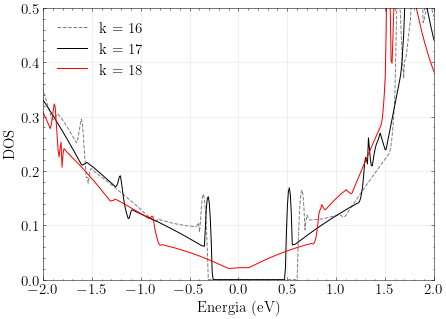

In [66]:
plt.plot(energy_16, dos_16, c='grey', ls='--', label='k = 16')
plt.plot(energy_17, dos_17, c='k', ls='-', label='k = 17')
plt.plot(energy_18, dos_18, c= 'r', label='k = 18')
plt.xlim(-2,2)
plt.ylim(0, 0.5)
plt.xlabel('Energia (eV)')
plt.ylabel('DOS')
plt.legend()
plt.grid(ls=':')
plt.savefig('figs/dos-analysis.png', dpi=300)
plt.show()

In [21]:
data_dos = np.loadtxt('../dos/graphene-dos-36.dat')
fermi_energy = 0.721

energy = data_dos[:,0] - fermi_energy
dos = data_dos[:,1]

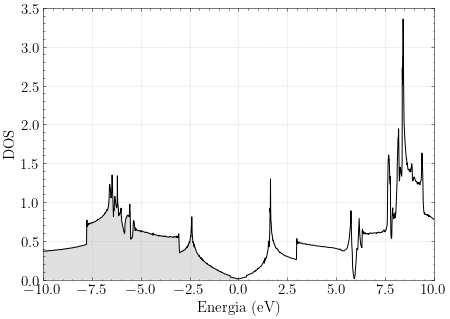

In [67]:
plt.plot(energy, dos, c='k')
plt.xlim(-10,10)
plt.ylim(0, 3.5)
plt.xlabel('Energia (eV)')
plt.ylabel('DOS')
plt.fill_between(x=energy, y1=0, y2=dos, where=(energy < 0), facecolor='grey', alpha=0.25)
plt.savefig('figs/dos.png', dpi=300)
plt.grid(ls=':')
plt.show()

# Bands

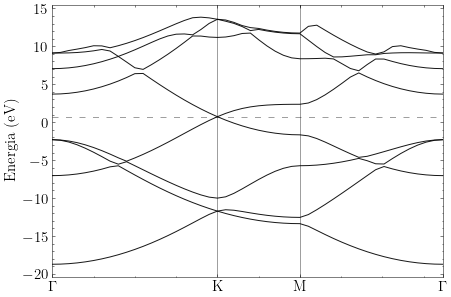

In [68]:
data_bands = np.loadtxt('../bands/graphene-bands.dat.gnu')

k = np.unique(data_bands[:, 0])
bands = np.reshape(data_bands[:, 1], (-1, len(k)))

for band in range(len(bands)):
    plt.plot(k, bands[band, :], linewidth=1, alpha=0.9, color='k')
plt.xlim(min(k), max(k))

# Fermi energy
plt.axhline(fermi_energy, linestyle=(0, (8, 10)), linewidth=0.75, color='k', alpha=0.5)
# High symmetry k-points (check bands_pp.out)
plt.axvline(0.6667, linewidth=0.75, color='k', alpha=0.5)
plt.axvline(1, linewidth=0.75, color='k', alpha=0.5)
# text labels
plt.xticks(ticks= [0, 0.6667, 1, 1.5774], labels=['$\Gamma$', 'K', 'M', '$\Gamma$'])
plt.ylabel("Energia (eV)")
plt.savefig('figs/bands.png', dpi=300)
plt.show()